# Statistiques descriptives du jeu de données

### Initialisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tlp\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv(r'data_cleaned/initial_corpus.csv')
# df.replace({'Ã©': 'é', 'Ã¨': 'è', 'Ãª': 'ê', 'Ã´': 'ô','Ã': 'à','Â': '', 'â': "'", 'à ': 'à'}, regex=True, inplace=True)
# df["CJournal"].replace("Autre", "Echos", inplace=True)
# print(df.shape)
df.head()

,Journal,Titre,Date,Auteur,Texte,extrait_debut,extrait_fin,CJournal
0,"Le Figaro, no. 23520",L'agenda caché de Moscou en Italie,2020-03-30,"Lasserre, Isabelle",LES SYMBOLES comptent parfois plus que les fai...,"Sur les camions militaires qui, en colonnes, ...",Deux semaines pour se ressaisir et s'unir ou p...,Figaro
1,Le Monde,Récit Les trois semaines qui ont chamboulé l...,2020-03-27,"Éric Albert, Cécile Boutelet, Jérôme Gautheret...","Londres, Berlin, Rome et Bruxelles corresponda...","- Jeudi 26 mars, les Vingt-Sept devaient se r...","pandémie touche tout le monde, indifféremment ...",Monde
2,Le Figaro (site web),Élargissement de l’Union européenne à l’heure ...,2020-03-26,"Tandonnet, Maxime",Fin observateur de la vie politique française ...,"contributeur régulier du FigaroVox, Maxime Tan...",es yeux et de se préparer au changement d’un m...,Figaro
3,Le Monde (site web),Coronavirus : les trois semaines qui ont chamb...,2020-03-26,"Eric Albert, Jérôme Gautheret, Cécile Boutelet...","Jeudi 26 mars, les Vingt-Sept doivent se réuni...",n visioconférence pour la troisième fois en mo...,"e la tenue de ses comptes publics, n’est pas s...",Monde
4,Le Monde (site web),Marc Lazar : « Plus l’Italie fait nation face ...,2020-03-25,Marc Lazar,Tribune. L’Italie est le pays qui enregistre à...,date du 25 mars le plus grand nombre de morts...,t de la School of Government de la Luiss (Libr...,Monde


### Proportion d'articles par journaux

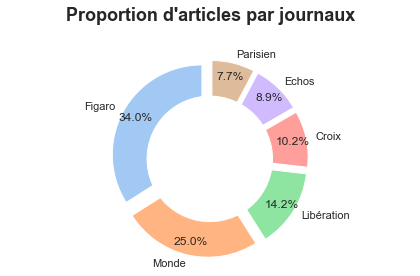

In [25]:
# Supposons que df["CJournal"].value_counts() retourne un objet Series avec les comptages
comptages = df["CJournal"].value_counts()

# Créer le graphique pie avec Seaborn
# plt.figure(figsize=(8, 8))
# sns.set(style="whitegrid")
# plt.pie(comptages, labels=comptages.index, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Distribution des journaux', fontsize=18, loc='center', pad=20, weight='bold')
# plt.show()

labels = df["CJournal"].unique().tolist()
# Couleurs personnalisées
colors = sns.color_palette('pastel')[0:len(comptages)]

# plt.figure(figsize=(10, 8))
# plt.pie(comptages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
# plt.axis('equal')  # Ratio aspect égal pour un cercle
# plt.title('Distribution des journaux', fontsize=22, loc='center', pad=30, weight='bold', color='navy')
# plt.tight_layout()  # Ajuster le tracé pour éviter les coupures
# plt.show()

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots()
plt.pie(comptages, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion d\'articles par journaux', fontsize=18, loc='center', pad=30, weight='bold')
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [5]:
pd.DataFrame(comptages).reset_index(names="Journal").rename(columns={"CJournal":"Articles"})

,Journal,count
0,Figaro,3030
1,Monde,2232
2,Echos,1264
3,Libération,906
4,Croix,797
5,Parisien,689


CJournal,Date,Croix,Echos,Figaro,Libération,Monde,Parisien
0,2009,2,0,0,0,1,0
1,2010,0,0,0,1,1,0
2,2011,4,0,2,2,0,0
3,2012,0,0,0,0,1,0
4,2013,1,0,2,2,0,0


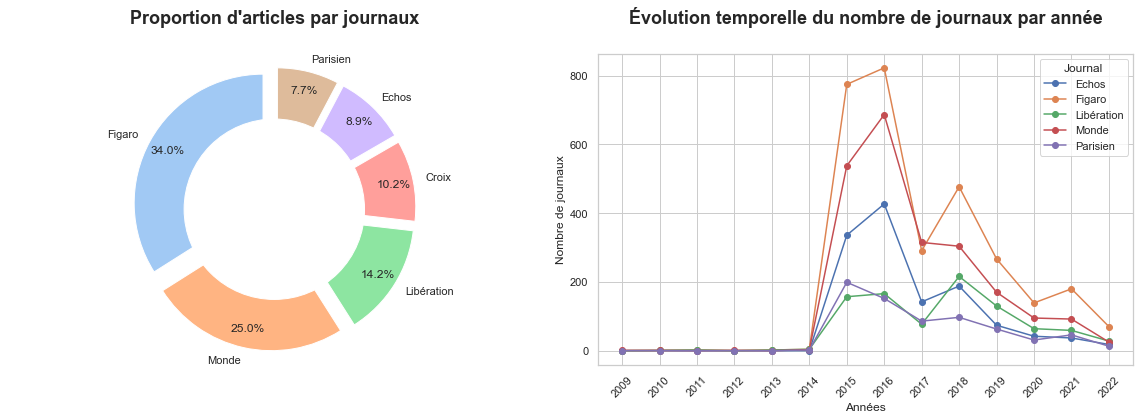

In [52]:
labels = df["CJournal"].unique().tolist()
# Couleurs personnalisées
colors = sns.color_palette('pastel')[0:len(comptages)]

plt.figure(figsize=(16, 6))

# Premier sous-tracé
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.subplot(1, 2, 1)
plt.pie(comptages, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion d\'articles par journaux', fontsize=18, loc='center', pad=30, weight='bold')
# plt.tight_layout()
plt.axis('equal')


# Deuxième sous-tracé
plt.subplot(1, 2, 2)
df_yearly = df.groupby([df['Date'].dt.year, df['CJournal']]).size().unstack(fill_value=0)

# df_yearly.plot(kind='line', marker='o', linewidth=2)
# plt.plot(data=df_yearly, kind='line', marker='o', linewidth=2)
df_yearly.reset_index(inplace=True)
display(df_yearly.head())
for journal in df_yearly.columns[2:]:  # En excluant la colonne 'Date'
    plt.plot(df_yearly['Date'].astype(int), df_yearly[journal], marker='o', label=journal)

plt.title('Évolution temporelle du nombre de journaux par année', fontsize=18, loc='center', pad=30, weight='bold')
plt.xlabel('Années')
plt.ylabel('Nombre de journaux')
plt.xticks(range(2009,2023), rotation=45)
# plt.xlim(2009,2023)
plt.legend(title='Journal')
plt.grid(True)
plt.tight_layout()
# plt.axis('equal')


plt.tight_layout()  # Ajuster le tracé pour éviter les coupures
plt.show()

In [42]:
df_yearly.dtypes

CJournal
Date          int32
Croix         int64
Echos         int64
Figaro        int64
Libération    int64
Monde         int64
Parisien      int64
dtype: object

### Distribution temporelle par journaux

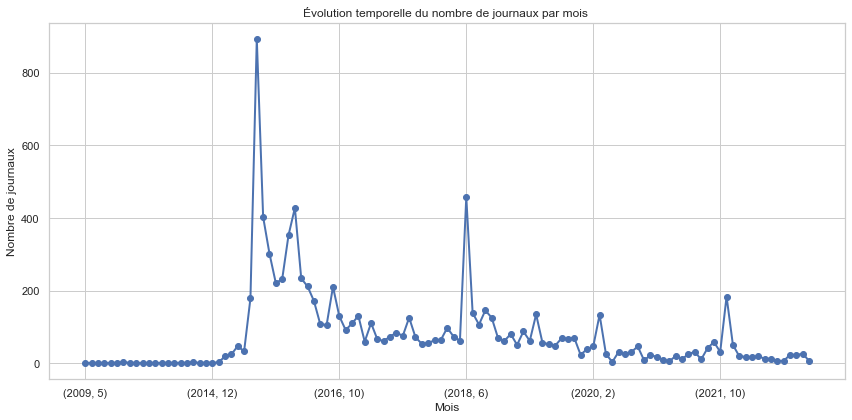

<Figure size 864x432 with 0 Axes>

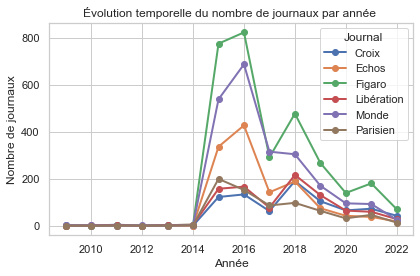

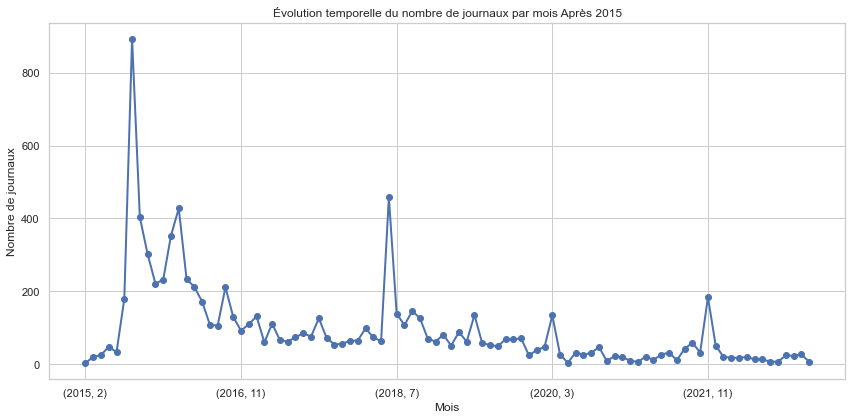

<Figure size 864x432 with 0 Axes>

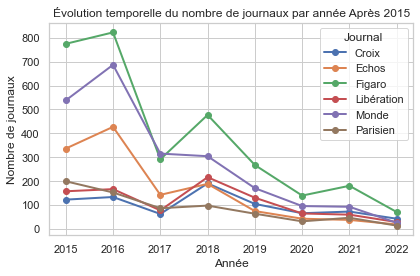

In [6]:
# Convertir la colonne "Date" en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtrer les données pour les années avant et après 2015
df_before_2015 = df[df['Date'].dt.year < 2015]
df_after_2015 = df[df['Date'].dt.year >= 2015]

# Créer des DataFrames pour les graphiques par mois et par année
dfs = [(df, ''), (df_after_2015, 'Après 2015')]

# Tracer les graphiques pour chaque période
for df_period, title in dfs:
    # Graphique par mois
    df_monthly = df_period["Date"].groupby([df_period['Date'].dt.year, df_period['Date'].dt.month]).count()

    plt.figure(figsize=(12, 6))
    df_monthly.plot(kind='line', marker='o', linewidth=2)
    plt.title(f'Évolution temporelle du nombre de journaux par mois {title}')
    plt.xlabel('Mois')
    plt.ylabel('Nombre de journaux')
#     plt.legend(title='Journal')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Graphique par année
    df_yearly = df_period.groupby([df_period['Date'].dt.year, df_period['CJournal']]).size().unstack(fill_value=0)
    plt.figure(figsize=(12, 6))
    df_yearly.plot(kind='line', marker='o', linewidth=2)
    plt.title(f'Évolution temporelle du nombre de journaux par année {title}')
    plt.xlabel('Année')
    plt.ylabel('Nombre de journaux')
    plt.legend(title='Journal')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Il n'y a qu'après 2015 qu'on peux en tirer quelque chose

<Figure size 1440x1080 with 0 Axes>

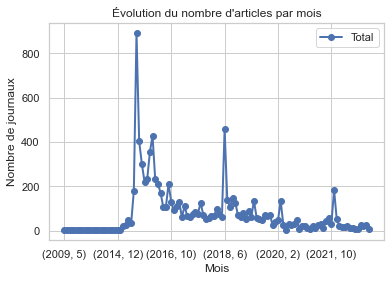

<Figure size 1440x1080 with 0 Axes>

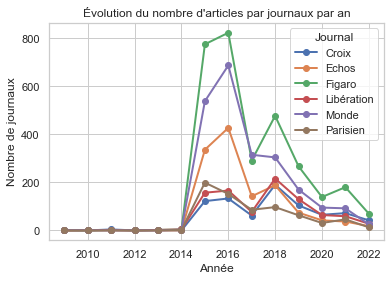

In [7]:
# Convertir la colonne "Date" en type datetime
df['Date'] = pd.to_datetime(df['Date'])
df["Annee"] = df['Date'].dt.year
df["Mois"] = df['Date'].dt.month


# Graphique par mois
df_monthly = df[["Annee","Mois","CJournal"]].groupby(['Annee','Mois']).count().rename(columns={"CJournal":"Total"})

plt.figure(figsize=(20, 15))
df_monthly.plot(kind='line', marker='o', linewidth=2)
plt.title(f"Évolution du nombre d'articles par mois")
plt.xlabel('Mois')
plt.ylabel('Nombre de journaux')


# # Obtenir les étiquettes des mois au format 'mm-yyyy' en utilisant une double boucle for
# labels = []
# for year, month in np.array(df_monthly.reset_index()[["Annee","Mois"]]):
#     labels.append(f"{month:02d}-{year}")
# #         if year == 2015 and month < 2:
# #             continue  # Ignorer janvier 2015
# #         if year == 2020 and month > 12:
# #             break  # Sortir de la boucle après décembre 2020
# #         labels.append(f"{month:02d}-{year}")

# # Définir les étiquettes des mois sur l'axe des abscisses
# plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.grid(True)
# plt.tight_layout()
plt.show()

# Graphique par année
df_yearly = df.groupby([df['Date'].dt.year, df['CJournal']]).size().unstack(fill_value=0)
plt.figure(figsize=(20, 15))
df_yearly.plot(kind='line', marker='o', linewidth=2)
plt.title(f"Évolution du nombre d'articles par journaux par an")
plt.xlabel('Année')
plt.ylabel('Nombre de journaux')
plt.legend(title='Journal')
plt.grid(True)
# plt.tight_layout()
plt.show()

### Longueur moyenne des articles

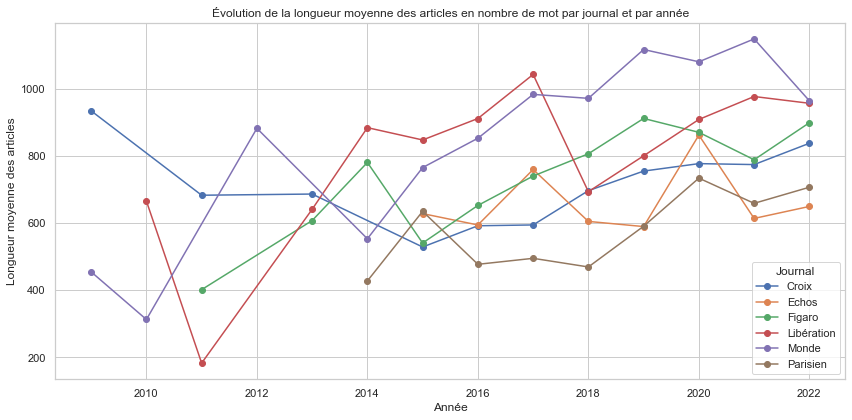

In [8]:
# Calculer la longueur de chaque article (nombre de mots)
df['Longueur_article'] = df['Texte'].apply(lambda x: len(x.split()))

# Extraire l'année à partir de la colonne "Date"
df['Année'] = df['Date'].dt.year

# Agréger les données par journal et par année
df_aggregated = df.groupby(['CJournal', 'Année']).agg({'Longueur_article': 'mean'}).reset_index()

# Tracer l'évolution de la longueur moyenne des articles par journal et par année
journals = df_aggregated['CJournal'].unique()
plt.figure(figsize=(12, 6))

for journal in journals:
    df_journal = df_aggregated[df_aggregated['CJournal'] == journal]
    plt.plot(df_journal['Année'], df_journal['Longueur_article'], marker='o', label=journal)

plt.title('Évolution de la longueur moyenne des articles en nombre de mot par journal et par année')
plt.xlabel('Année')
plt.ylabel('Longueur moyenne des articles')
plt.legend(title='Journal')
plt.grid(True)
plt.tight_layout()
plt.show()